In [29]:
import pandas as pd

df = pd.read_csv(
    'results.txt', 
    header=None, 
    names=["gemm_method", "n", "m", "executions_per_second"]
)

df

,gemm_method,n,m,executions_per_second
0,basic,4,4,376787.909091
1,basic,16,16,42010.090909
2,basic,64,64,954.636364
3,basic,256,256,7.636364
4,basic,1024,1024,0.090909
...,...,...,...,...
58,block_parallel_simd,64,64,1156.818182
59,block_parallel_simd,256,256,20.000000
60,block_parallel_simd,1024,1024,0.272727
61,block_parallel_simd,2058,2058,0.038462


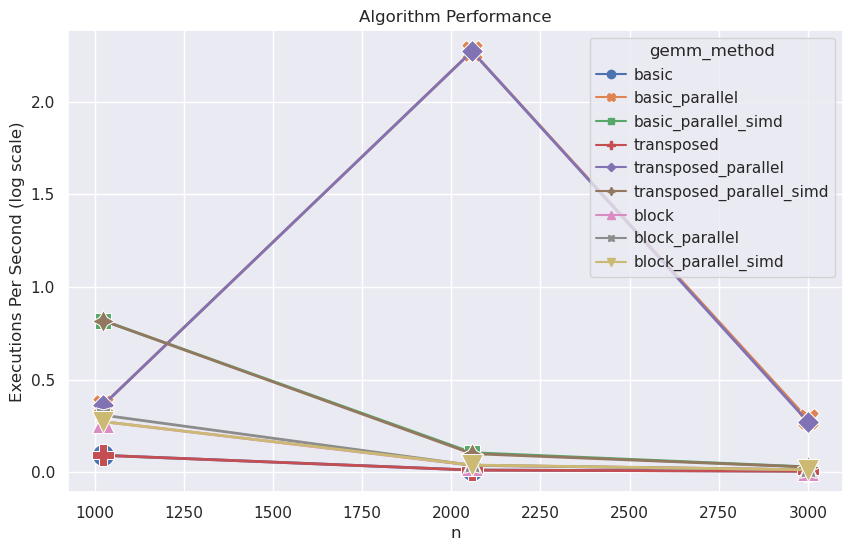

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame after loading the data
df['n_m_product'] = df['n'] * df['m']
df = df.loc[df['n'] >= 500]

# Set the style of the visualization
sns.set_theme(style="darkgrid")

# Create a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a line plot with a logarithmic y-axis
ax = sns.lineplot(
    x='n', 
    y='executions_per_second', 
    hue='gemm_method', 
    style='gemm_method', 
    markers=True, 
    dashes=False, 
    data=df,
    linewidth=2, 
    markersize=16
)

# Set the y-axis to a logarithmic scale
#ax.set_yscale('log')

# Set the x-axis to a logarithmic scale as well if needed
#ax.set_xscale('log')

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[:], title='gemm_method', 
          handletextpad=0.5, columnspacing=1, loc="upper right", ncol=1, frameon=True)

# Add titles and labels
plt.title('Algorithm Performance')
plt.xlabel('n')
plt.ylabel('Executions Per Second (log scale)')

# Optionally, you can manually set the x-ticks to be more readable
# ax.set_xticks([0, 2e5, 4e5, 6e5, 8e5, 1e6])
# ax.get_xaxis().get_major_formatter().set_scientific(False)

# Show the plot
plt.show()